In [1]:
#Import important Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [17]:
#Import CSV

In [3]:
df=pd.read_csv('microcredit.csv')

In [ ]:
#Data Exploration

In [4]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
#To remove the Unnamed column

In [10]:
df=df.drop(['Unnamed: 0'],axis=1)

In [11]:
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [12]:
#To understand the data shape

In [13]:
df.shape

(209593, 36)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [30]:
#Data Cleaning , analysis and visualization

In [20]:
#As the problem has already stated that there are no Null values

In [21]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [25]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [31]:
#From the above we can see that data is imbalanced and has outliers.Lets check it for few columns to visualise . we will work on scaling the data later

{'whiskers': [<matplotlib.lines.Line2D at 0x19281e81100>,
 'caps': [<matplotlib.lines.Line2D at 0x19281e817f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19281e6ed60>],
 'medians': [<matplotlib.lines.Line2D at 0x19281e81eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19281e891f0>],
 'means': []}

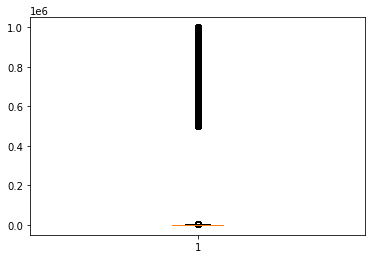

In [28]:
fig,ax=plt.subplots()
ax.boxplot(df["aon"])

{'whiskers': [<matplotlib.lines.Line2D at 0x19281edbbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x19281ee72b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19281edb850>],
 'medians': [<matplotlib.lines.Line2D at 0x19281ee7970>],
 'fliers': [<matplotlib.lines.Line2D at 0x19281ee7c70>],
 'means': []}

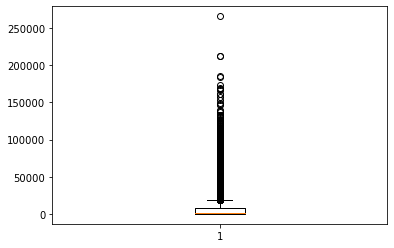

In [29]:
fig,ax=plt.subplots()
ax.boxplot(df["daily_decr30"])

{'whiskers': [<matplotlib.lines.Line2D at 0x19281f3d340>,
 'caps': [<matplotlib.lines.Line2D at 0x19281f3da00>,
 'boxes': [<matplotlib.lines.Line2D at 0x19281f31fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x19281f48100>],
 'fliers': [<matplotlib.lines.Line2D at 0x19281f48400>],
 'means': []}

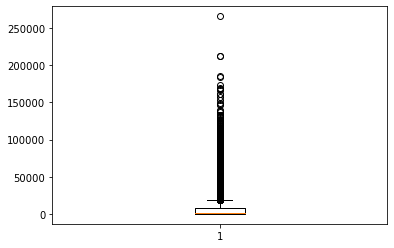

In [32]:
fig,ax=plt.subplots()
ax.boxplot(df["daily_decr30"])

{'whiskers': [<matplotlib.lines.Line2D at 0x19281f917c0>,
 'caps': [<matplotlib.lines.Line2D at 0x19281f91e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x19281f91460>],
 'medians': [<matplotlib.lines.Line2D at 0x19281f9c580>],
 'fliers': [<matplotlib.lines.Line2D at 0x19281f9c880>],
 'means': []}

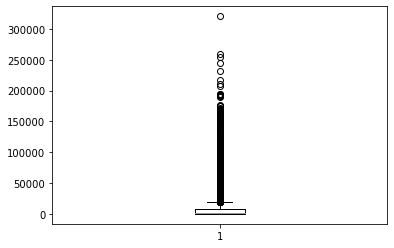

In [33]:
fig,ax=plt.subplots()
ax.boxplot(df["daily_decr90"])

{'whiskers': [<matplotlib.lines.Line2D at 0x19281ff2160>,
 'caps': [<matplotlib.lines.Line2D at 0x19281ff2820>,
 'boxes': [<matplotlib.lines.Line2D at 0x19281fe3dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x19281ff2ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19281ffb220>],
 'means': []}

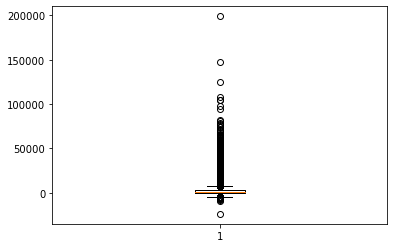

In [34]:
fig,ax=plt.subplots()
ax.boxplot(df["rental30"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1928203bf40>,
 'caps': [<matplotlib.lines.Line2D at 0x19282048640>,
 'boxes': [<matplotlib.lines.Line2D at 0x1928203bbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x19282048d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x19282052040>],
 'means': []}

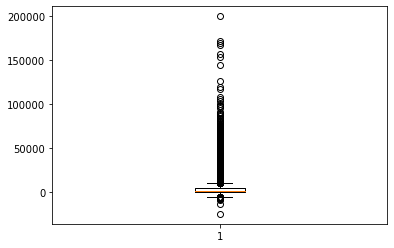

In [35]:
fig,ax=plt.subplots()
ax.boxplot(df["rental90"])

{'whiskers': [<matplotlib.lines.Line2D at 0x19282092d60>,
 'caps': [<matplotlib.lines.Line2D at 0x1928209f460>,
 'boxes': [<matplotlib.lines.Line2D at 0x19282092a00>],
 'medians': [<matplotlib.lines.Line2D at 0x1928209fb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1928209fe50>],
 'means': []}

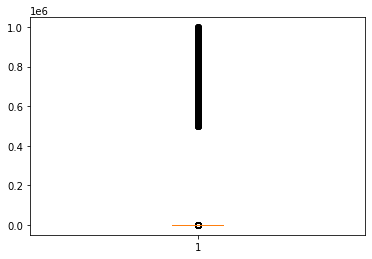

In [36]:
fig,ax=plt.subplots()
ax.boxplot(df["last_rech_date_ma"])

{'whiskers': [<matplotlib.lines.Line2D at 0x19281fc39d0>,
 'caps': [<matplotlib.lines.Line2D at 0x19281fc7160>,
 'boxes': [<matplotlib.lines.Line2D at 0x19281f60700>],
 'medians': [<matplotlib.lines.Line2D at 0x19281eaf3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19281ff2d30>],
 'means': []}

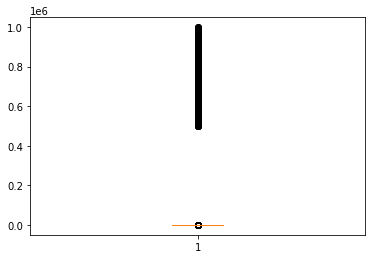

In [37]:
fig,ax=plt.subplots()
ax.boxplot(df["last_rech_date_da"])

{'whiskers': [<matplotlib.lines.Line2D at 0x19281dfe880>,
 'caps': [<matplotlib.lines.Line2D at 0x19281dfefd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x192f883b640>],
 'medians': [<matplotlib.lines.Line2D at 0x19281dd0b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x19281dd0af0>],
 'means': []}

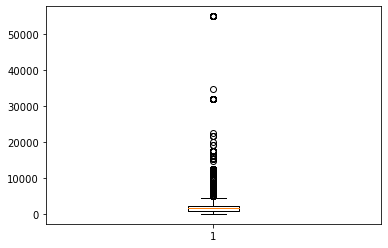

In [38]:
fig,ax=plt.subplots()
ax.boxplot(df["last_rech_amt_ma"])

{'whiskers': [<matplotlib.lines.Line2D at 0x19282147370>,
 'caps': [<matplotlib.lines.Line2D at 0x19282147a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1928213afd0>],
 'medians': [<matplotlib.lines.Line2D at 0x19282152130>],
 'fliers': [<matplotlib.lines.Line2D at 0x19282152430>],
 'means': []}

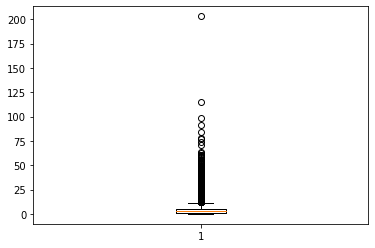

In [39]:
fig,ax=plt.subplots()
ax.boxplot(df["cnt_ma_rech30"])

{'whiskers': [<matplotlib.lines.Line2D at 0x192821a46d0>,
 'caps': [<matplotlib.lines.Line2D at 0x192821a4d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x192821a4370>],
 'medians': [<matplotlib.lines.Line2D at 0x192821ae490>],
 'fliers': [<matplotlib.lines.Line2D at 0x192821ae790>],
 'means': []}

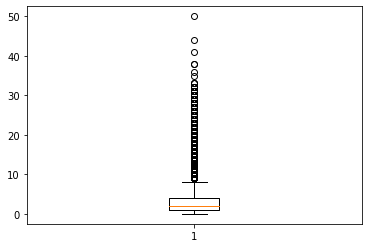

In [40]:
fig,ax=plt.subplots()
ax.boxplot(df["cnt_loans30"])

{'whiskers': [<matplotlib.lines.Line2D at 0x192821f7a90>,
 'caps': [<matplotlib.lines.Line2D at 0x19282203190>,
 'boxes': [<matplotlib.lines.Line2D at 0x192821f7730>],
 'medians': [<matplotlib.lines.Line2D at 0x19282203850>],
 'fliers': [<matplotlib.lines.Line2D at 0x19282203b50>],
 'means': []}

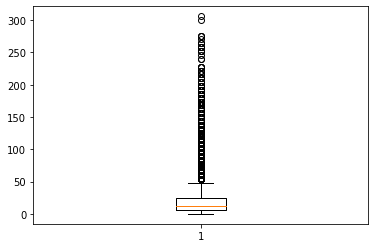

In [41]:
fig,ax=plt.subplots()
ax.boxplot(df["amnt_loans30"])

{'whiskers': [<matplotlib.lines.Line2D at 0x192822583d0>,
 'caps': [<matplotlib.lines.Line2D at 0x19282258a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x19282258070>],
 'medians': [<matplotlib.lines.Line2D at 0x19282263190>],
 'fliers': [<matplotlib.lines.Line2D at 0x19282263490>],
 'means': []}

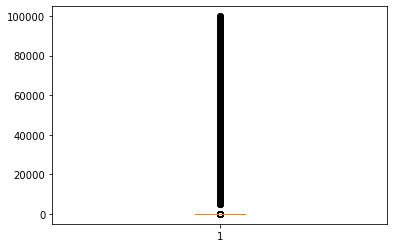

In [42]:
fig,ax=plt.subplots()
ax.boxplot(df["maxamnt_loans30"])

{'whiskers': [<matplotlib.lines.Line2D at 0x192822ad730>,
 'caps': [<matplotlib.lines.Line2D at 0x192822addf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x192822ad3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x19287fea4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19287fea7f0>],
 'means': []}

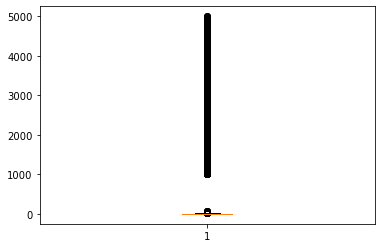

In [43]:
fig,ax=plt.subplots()
ax.boxplot(df["cnt_loans90"])

{'whiskers': [<matplotlib.lines.Line2D at 0x19288034a90>,
 'caps': [<matplotlib.lines.Line2D at 0x19288040190>,
 'boxes': [<matplotlib.lines.Line2D at 0x19288034730>],
 'medians': [<matplotlib.lines.Line2D at 0x19288040850>],
 'fliers': [<matplotlib.lines.Line2D at 0x19288040b50>],
 'means': []}

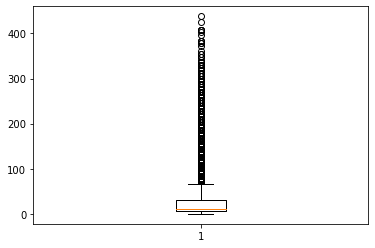

In [44]:
fig,ax=plt.subplots()
ax.boxplot(df["amnt_loans90"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1928808c8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1928808cf70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1928808c550>],
 'medians': [<matplotlib.lines.Line2D at 0x19288097670>],
 'fliers': [<matplotlib.lines.Line2D at 0x19288097970>],
 'means': []}

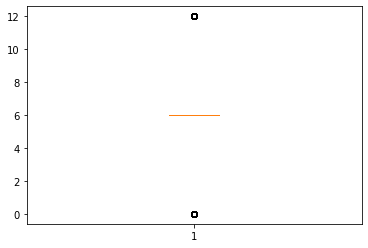

In [45]:
fig,ax=plt.subplots()
ax.boxplot(df["maxamnt_loans90"])

{'whiskers': [<matplotlib.lines.Line2D at 0x192880ec220>,
 'caps': [<matplotlib.lines.Line2D at 0x192880ec8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x192880dee80>],
 'medians': [<matplotlib.lines.Line2D at 0x192880ecfa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x192880f62e0>],
 'means': []}

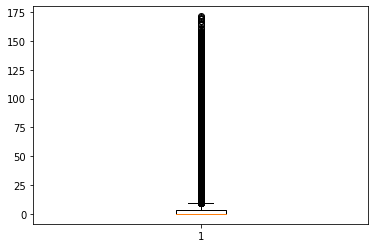

In [46]:
fig,ax=plt.subplots()
ax.boxplot(df["payback30"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1928813cfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x192881486d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1928813cc70>],
 'medians': [<matplotlib.lines.Line2D at 0x19288148dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19288153100>],
 'means': []}

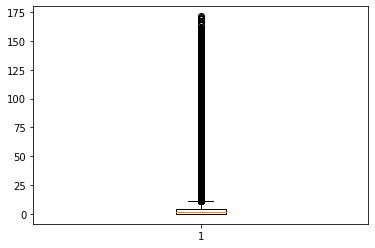

In [47]:
fig,ax=plt.subplots()
ax.boxplot(df["payback90"])

In [48]:
#Lets also visualize on the target variable which is label in this case

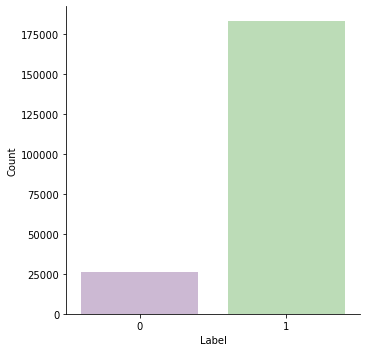

In [49]:
g=sns.catplot(x="label",data=df,kind="count",palette="PRGn",alpha=1)
g.set(xlabel="Label",ylabel="Count")
plt.show()

In [51]:
#Correlation matrix: To figure out which data is most closely related

In [52]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


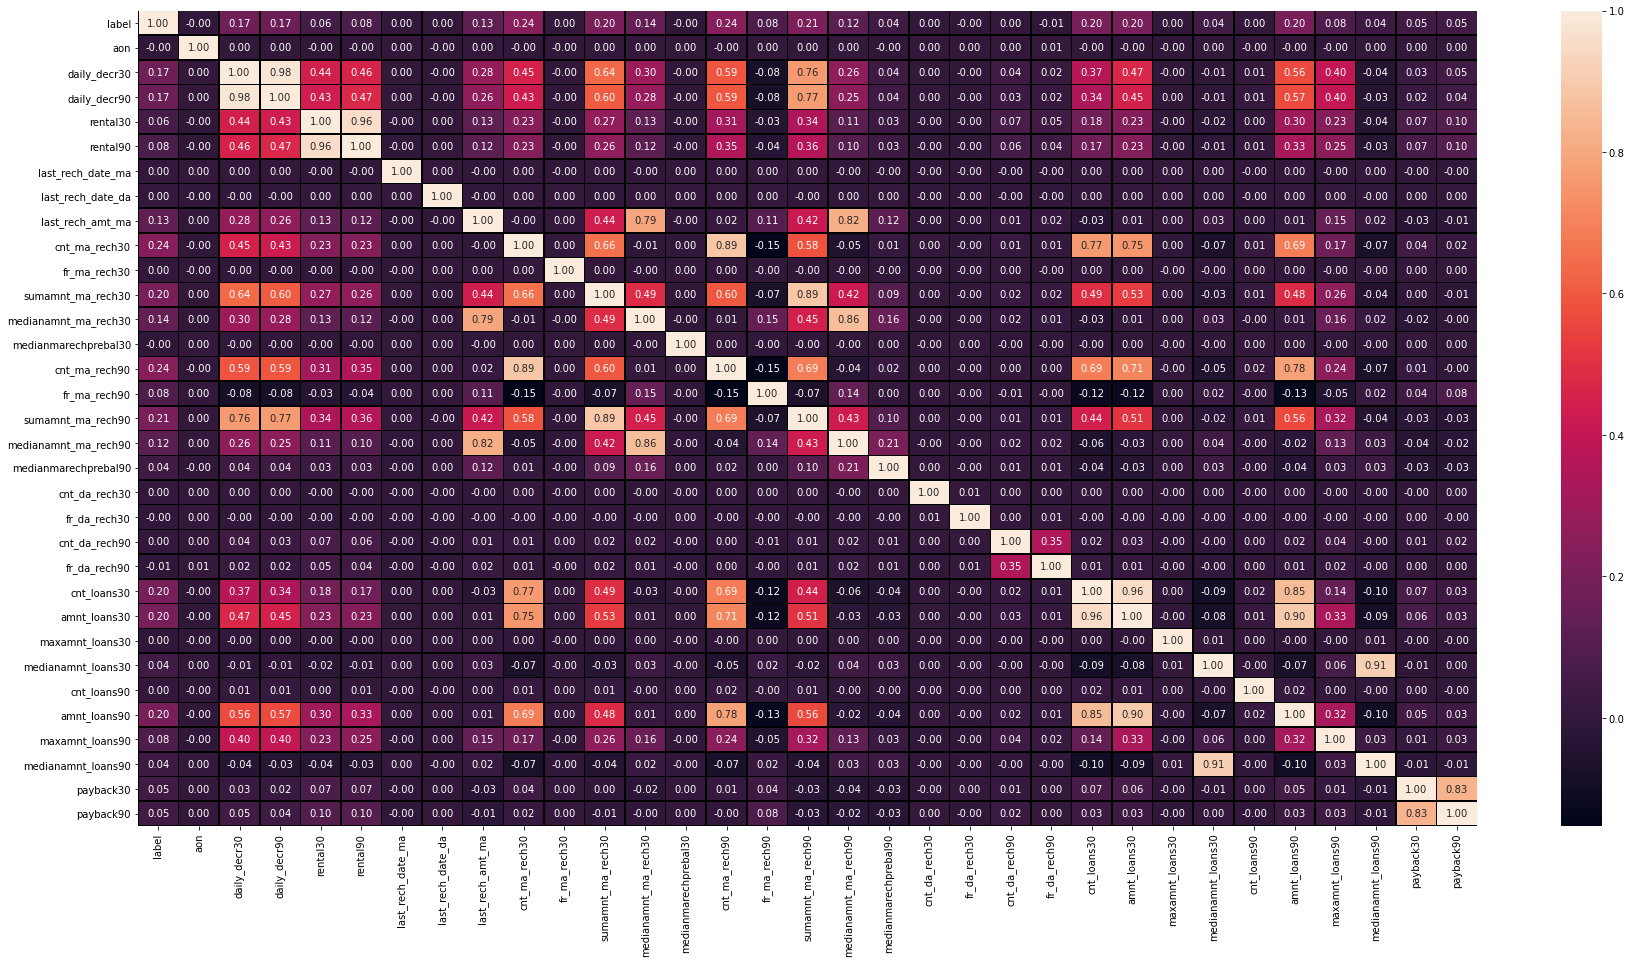

In [54]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True,linewidth=.5,linecolor="black",fmt='.2f')

In [58]:
#Normalizing the data because of the outliers.Also after checking the correlation. filtering out the most important columns

In [59]:
colnames=["label","sumamnt_ma_rech90","daily_decr90","sumamnt_ma_rech30","daily_decr30","rental90","medianamnt_ma_rech30","last_rech_amt_ma","medianamnt_ma_rech90","rental30","medianmarechprebal30","aon","medianmarechprebal90","amnt_loans90","cnt_da_rech30","amnt_loans30","cnt_ma_rech90","cnt_ma_rech30","last_rech_date_ma","fr_ma_rech30","fr_ma_rech90"]

In [61]:
df=df[colnames]
df1=df.iloc[:,1:]   #does not include Target variable "Label"
df1.head()

,sumamnt_ma_rech90,daily_decr90,sumamnt_ma_rech30,daily_decr30,rental90,medianamnt_ma_rech30,last_rech_amt_ma,medianamnt_ma_rech90,rental30,medianmarechprebal30,aon,medianmarechprebal90,amnt_loans90,cnt_da_rech30,amnt_loans30,cnt_ma_rech90,cnt_ma_rech30,last_rech_date_ma,fr_ma_rech30,fr_ma_rech90
0,3078,3065.150000,3078.0,3055.050000,260.13,1539.0,1539,1539.0,220.13,7.50,272.0,7.50,12,0.0,12,2,2,2.0,21.0,21
1,5787,12124.750000,5787.0,12122.000000,3691.26,5787.0,5787,5787.0,3691.26,61.04,712.0,61.04,12,0.0,12,1,1,20.0,0.0,0
2,1539,1398.000000,1539.0,1398.000000,900.13,1539.0,1539,1539.0,900.13,66.32,535.0,66.32,6,0.0,6,1,1,3.0,0.0,0
3,947,21.228000,0.0,21.228000,159.42,0.0,947,947.0,159.42,0.00,241.0,2.50,12,0.0,12,1,0,41.0,0.0,0
4,23496,150.619333,20029.0,150.619333,1098.90,2309.0,2309,2888.0,1098.90,29.00,947.0,35.00,42,0.0,42,8,7,4.0,2.0,2


In [62]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df1) 
df1.loc[:,:] = scaled_values

In [63]:
#Model Building

In [64]:
from sklearn.model_selection import train_test_split

In [67]:
X = df1


In [73]:
y=df['label']

In [74]:
X.head()

,sumamnt_ma_rech90,daily_decr90,sumamnt_ma_rech30,daily_decr30,rental90,medianamnt_ma_rech30,last_rech_amt_ma,medianamnt_ma_rech90,rental30,medianmarechprebal30,aon,medianmarechprebal90,amnt_loans90,cnt_da_rech30,amnt_loans30,cnt_ma_rech90,cnt_ma_rech30,last_rech_date_ma,fr_ma_rech30,fr_ma_rech90
0,0.003230,0.009847,0.003800,0.011834,0.111090,0.027982,0.027982,0.027982,0.107594,0.000208,0.000320,0.004981,0.027397,0.0,0.039216,0.005952,0.009852,0.000031,0.000021,0.238636
1,0.006072,0.038094,0.007144,0.045918,0.126349,0.105218,0.105218,0.105218,0.123183,0.000261,0.000760,0.006266,0.027397,0.0,0.039216,0.002976,0.004926,0.000049,0.000000,0.000000
2,0.001615,0.004649,0.001900,0.005605,0.113936,0.027982,0.027982,0.027982,0.110648,0.000266,0.000583,0.006393,0.013699,0.0,0.019608,0.002976,0.004926,0.000032,0.000000,0.000000
3,0.000994,0.000356,0.000000,0.000429,0.110642,0.000000,0.017218,0.017218,0.107322,0.000200,0.000289,0.004861,0.027397,0.0,0.039216,0.002976,0.000000,0.000070,0.000000,0.000000
4,0.024654,0.000760,0.024724,0.000916,0.114820,0.041982,0.041982,0.052509,0.111541,0.000229,0.000995,0.005641,0.095890,0.0,0.137255,0.023810,0.034483,0.000033,0.000002,0.022727


In [75]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [76]:
#Splitting the data

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [78]:
#Random Forest:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [79]:
#Logistic Regression 

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

C:\Users\sarmi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
